<a href="https://colab.research.google.com/github/SefiyeArican/Face-expression-recognition/blob/main/Face_expression_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Access to the dataset via google drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

dataset_path = "/content/drive/MyDrive/archive.zip"

with zipfile.ZipFile(os.path.join(dataset_path), 'r') as zip_ref:
    zip_ref.extractall("/content/")

**Data loading and review**

In [3]:
import os
from PIL import Image

data_dir = '/content/images/images'

def count_images_in_directory(data_dir):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_count = 0

    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue

    return image_count

data_dir = '/content/images/images/train'
print(f"Number of images in the Train folder: {count_images_in_directory(data_dir)}")
data_dir = '/content/images/images/validation'
print(f"Number of images in the Validation folder: {count_images_in_directory(data_dir)}")

Number of images in the Train folder: 28821
Number of images in the Validation folder: 7066


Since the number of data seems sufficient, I don't see the need to generate data, I will work with the existing dataset.

**What is the type of these images in the dataset?**

In [4]:
import os
from collections import defaultdict

data_dir = '/content/images/images'

def count_image_types(data_dir):
    # Create a dictionary of image types and numbers
    image_types = defaultdict(int)

    # Navigate files in folders and subfolders
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            # Get file extension
            ext = os.path.splitext(file)[1].lower()
            if ext in ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']:
                image_types[ext] += 1

    return image_types

print("Types of images in Train set:")
data_dir = '/content/images/images/train'
image_types_counts = count_image_types(data_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


print("Types of images in Validation set:")
data_dir = '/content/images/images/validation'
image_types_counts = count_image_types(data_dir)

for ext, count in image_types_counts.items():
    print(f"{ext}: {count} image{'s' if count > 1 else ''}")


Types of images in Train set:
.jpg: 28821 images
Types of images in Validation set:
.jpg: 7066 images


All images type is .jpg

In [5]:
import os

def count_and_list_subfolders(data_dir):
    #  List subclasses
    subfolders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
    return len(subfolders), subfolders

# Get the number and names of subfolders in the Train folder
data_dir = '/content/images/images/train'
num_subfolders_train, subfolders_train = count_and_list_subfolders(data_dir)
print(f"Number of subfolders (classes) in the Train folder: {num_subfolders_train}")

print("The name of subfolders (classes) in the Train folder:")
for subfolder in subfolders_train:
    print(subfolder)

print("\n")

# Get the number and names of subfolders in the Validation folder
data_dir = '/content/images/images/validation'
num_subfolders_validation, subfolders_validation = count_and_list_subfolders(data_dir)
print(f"Number of subfolders (classes) in the Validation folder: {num_subfolders_validation}")

print("The name of subfolders (classes) in the Validation folder:")
for subfolder in subfolders_validation:
    print(subfolder)



Number of subfolders (classes) in the Train folder: 7
The name of subfolders (classes) in the Train folder:
happy
fear
sad
neutral
angry
surprise
disgust


Number of subfolders (classes) in the Validation folder: 7
The name of subfolders (classes) in the Validation folder:
happy
fear
sad
neutral
angry
surprise
disgust


There are 2 main classes in the dataset; Train and Validation. These classes have 7 subclasses. The names of these subclasses are "disgust, neutral, sad, angry, surprise, happy, fear".

In [6]:
import os
from PIL import Image

data_dir = '/content/images/images'

def count_images_in_directory(data_dir):

    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp']

    image_counts = {}

    # Navigate files in folders and subfolders
    for root, dirs, files in os.walk(data_dir):
        image_count = 0
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_extensions):
                try:
                    # Check if it is visual
                    with Image.open(os.path.join(root, file)) as img:
                        img.verify()  # This line checks if the image is broken
                    image_count += 1
                except (IOError, SyntaxError):
                    # Skip non-visual files
                    continue
        # Store image counts in subfolders
        if image_count > 0:
            image_counts[os.path.basename(root)] = image_count # get only the last part of the file path, i.e. the name of the folder

    return image_counts

train_data_dir = '/content/images/images/train'
image_counts = count_images_in_directory(train_data_dir)
print("Train Folder")
# Print names and image counts of subfolders
for folder, count in image_counts.items():
    print(f"* {folder} - {count}")

print("\n")

validation_data_dir = '/content/images/images/validation'
image_counts = count_images_in_directory(validation_data_dir)
print("Validation Folder")
# Print names and image counts of subfolders
for folder, count in image_counts.items():
    print(f"* {folder} - {count}")


Train Folder
* happy - 7164
* fear - 4103
* sad - 4938
* neutral - 4982
* angry - 3993
* surprise - 3205
* disgust - 436


Validation Folder
* happy - 1825
* fear - 1018
* sad - 1139
* neutral - 1216
* angry - 960
* surprise - 797
* disgust - 111


**Data distribution tables**

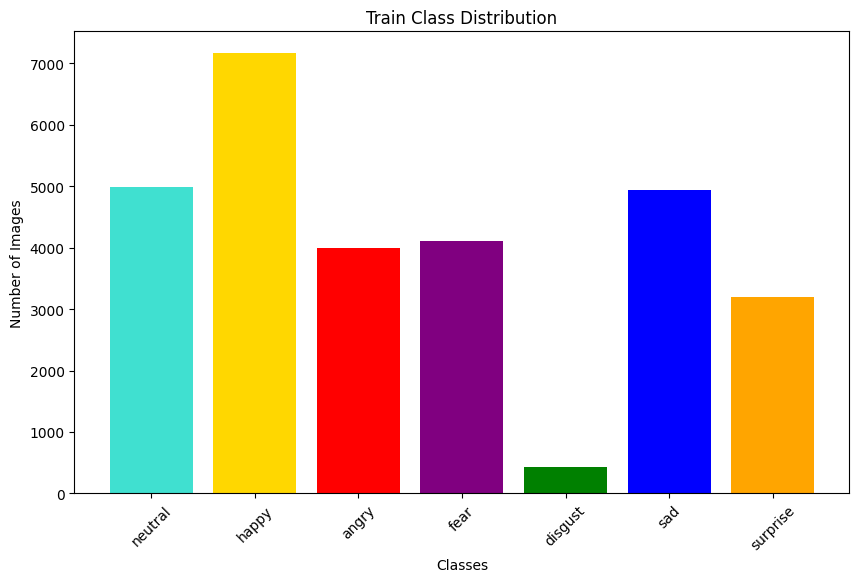

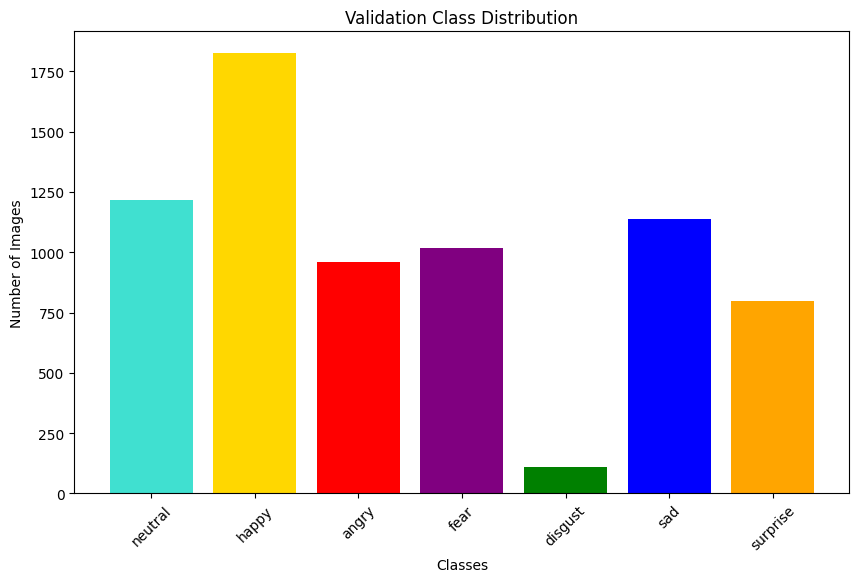

In [7]:
import matplotlib.pyplot as plt

# Class names and number of images in the class for train folder
class_names = ['neutral', 'happy', 'angry', 'fear', 'disgust', 'sad', 'surprise']
class_counts = [4982, 7164, 3993, 4103, 436, 4938, 3205]


colors = ['turquoise', 'gold', 'red', 'purple', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=colors)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Train Class Distribution')
plt.xticks(rotation=45)
plt.show()


# Class names and number of images in the class validation folder
class_names = ['neutral', 'happy', 'angry', 'fear', 'disgust', 'sad', 'surprise']
class_counts = [1216, 1825, 960, 1018, 111, 1139, 797]

colors = ['turquoise', 'gold', 'red', 'purple', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=colors)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Validation Class Distribution')
plt.xticks(rotation=45)
plt.show()


**Visualization of the sample image**

This step allows us to learn about the dataset by selecting a random image from the dataset.

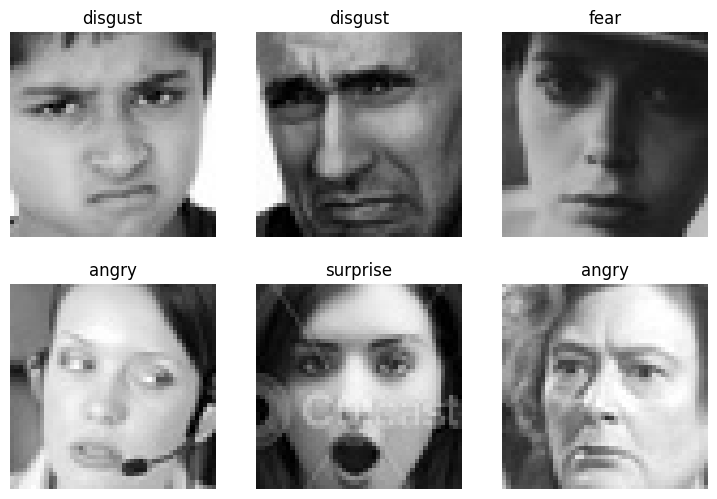

In [8]:
import matplotlib.pyplot as plt
import cv2
import os
import random

data_dir = '/content/images/images'

class_train = os.path.join(data_dir, 'train')
train_sub_classes = [sub_class for sub_class in os.listdir(class_train) if os.path.isdir(os.path.join(class_train, sub_class))]

class_validation = os.path.join(data_dir, 'validation')
validation_sub_classes = [sub_class for sub_class in os.listdir(class_validation) if os.path.isdir(os.path.join(class_validation, sub_class))]

# Merge 'Train' and 'Validation' subclasses
all_classes = train_sub_classes + validation_sub_classes

# 6 different random images to show
num_images_to_show = 6

plt.figure(figsize=(9, 6))

for i in range(num_images_to_show):
    # Randomly select one of the subclasses
    selected_class = random.choice(all_classes)

    # Check if the selected subclass is in the "train" or "validation" folders and create the file path
    if selected_class in train_sub_classes:
        selected_class_path = os.path.join(class_train, selected_class)
    else:
        selected_class_path = os.path.join(class_validation, selected_class)

    # Randomly select an image from the selected subclass
    sample_image_path = os.path.join(selected_class_path, random.choice(os.listdir(selected_class_path)))

    # Reading the image
    image = cv2.imread(sample_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show image as a subplot
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(selected_class)

plt.show()

The images in the dataset are in black and white. So we will not need color editing.

**Creating 'Test' data set from 'Train' data set**

In [9]:
import os
import random
import shutil

def create_test_set_from_train(train_dir, test_dir, test_size=0.2):
    # Creating the test folder
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Creating test data set from Train folder
    train_sub_classes = [sub_class for sub_class in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, sub_class))]

    for sub_class in train_sub_classes:
        sub_class_dir = os.path.join(train_dir, sub_class)
        images = os.listdir(sub_class_dir)
        random.shuffle(images)

        # Number of images to be allocated to the test dataset
        num_test_images = int(len(images) * test_size)
        test_images = images[:num_test_images]

        # Creating new test subfolder
        test_sub_class_dir = os.path.join(test_dir, sub_class)
        if not os.path.exists(test_sub_class_dir):
            os.makedirs(test_sub_class_dir)

        # Move images to test folder
        for image in test_images:
            src = os.path.join(sub_class_dir, image)
            dst = os.path.join(test_sub_class_dir, image)
            shutil.move(src, dst)


train_dir = '/content/images/images/train'
test_dir = '/content/images/images/test'
create_test_set_from_train(train_dir, test_dir, test_size=0.2)

# Print the number of images in Train and Test folders
def count_images_in_dir(directory):
    total_images = 0
    sub_classes = [sub_class for sub_class in os.listdir(directory) if os.path.isdir(os.path.join(directory, sub_class))]
    for sub_class in sub_classes:
        sub_class_dir = os.path.join(directory, sub_class)
        total_images += len(os.listdir(sub_class_dir))
    return total_images

num_train_images = count_images_in_dir(train_dir)
num_test_images = count_images_in_dir(test_dir)

print(f"Number of images in the Train folder after splitting: {num_train_images}")
print(f"Number of images in the Test folder: {num_test_images}")


Number of images in the Train folder after splitting: 23060
Number of images in the Test folder: 5761


**Data distribution in the generated 'Test' dataset**

Test Folder
* happy - 1432
* fear - 820
* sad - 987
* neutral - 996
* angry - 798
* surprise - 641
* disgust - 87


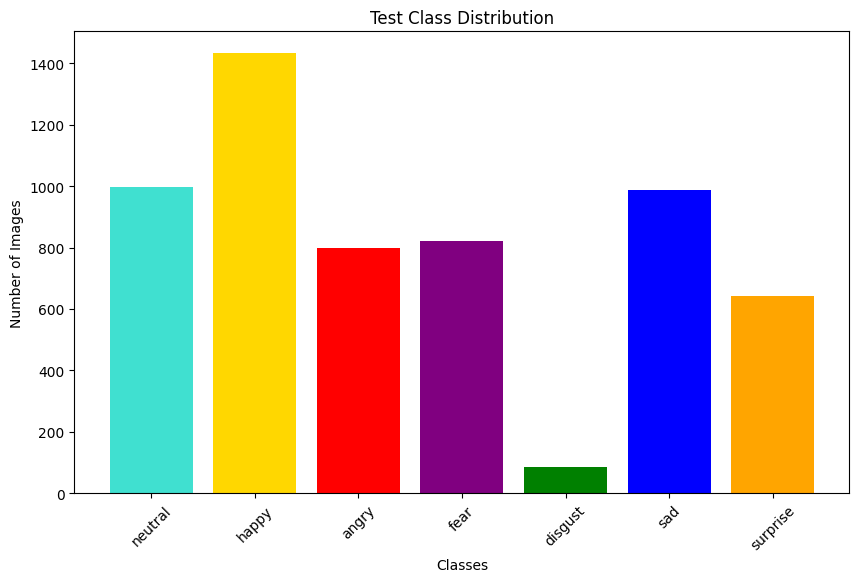

In [10]:
data_dir = '/content/images/images/test'
image_counts = count_images_in_directory(data_dir)
print("Test Folder")
# Print names and image counts of subfolders
for folder, count in image_counts.items():
    print(f"* {folder} - {count}")

# Class names and number of images in the class test folder
class_names = ['neutral', 'happy', 'angry', 'fear', 'disgust', 'sad', 'surprise']
class_counts = [996, 1432, 798, 820, 87, 987, 641]

colors = ['turquoise', 'gold', 'red', 'purple', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts, color=colors)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Test Class Distribution')
plt.xticks(rotation=45)
plt.show()


**Are the images all the same size?**

In [11]:
import os
import cv2

def get_image_sizes(directory):
    image_sizes = {}
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                if image is not None:
                    height, width = image.shape[:2]
                    image_sizes[file] = (width, height)
    return image_sizes

def check_image_sizes(image_sizes):
    unique_sizes = set(image_sizes.values())
    if len(unique_sizes) == 1:
        print(f"All images have the same size: {unique_sizes.pop()}")
    else:
        print("Images have different sizes:")
        for file, size in image_sizes.items():
            print(f"{file}: {size}")

train_dir = '/content/images/images/train'
validation_dir = '/content/images/images/validation'
test_dir = '/content/images/images/test'

train_image_sizes = get_image_sizes(train_dir)
validation_image_sizes = get_image_sizes(validation_dir)
test_image_sizes = get_image_sizes(test_dir)

print("Train set image sizes:")
check_image_sizes(train_image_sizes)

print("\nValidation set image sizes:")
check_image_sizes(validation_image_sizes)

print("\nTest set image sizes:")
check_image_sizes(test_image_sizes)


Train set image sizes:
All images have the same size: (48, 48)

Validation set image sizes:
All images have the same size: (48, 48)

Test set image sizes:
All images have the same size: (48, 48)


The images are all the same size so there is no need to reshape them.

**Normalization**

In [13]:
import os
import cv2 # Import OpenCV library for computer vision tasks
import numpy as np # Import NumPy for numerical operations and handling arrays
from tqdm import tqdm # Import tqdm for displaying progress bars during iterations

train_dir = '/content/images/images/train'
test_dir = '/content/images/images/test'

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
class_names_label = {class_name: i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (48, 48)

def load_data(dataset_path):
    images = []
    labels = []

    print("Loading {}".format(dataset_path))

    # Iterate through each folder corresponding to a category
    for folder in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder)
        if not os.path.isdir(folder_path):
            continue
        label = class_names_label[folder]

        # Iterate through each image in our folder
        for file in tqdm(os.listdir(folder_path)):

            # Get the path name of the image
            img_path = os.path.join(folder_path, file)

            # Open and resize the image
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue
            image = cv2.resize(image, IMAGE_SIZE)

            # Append the image and its corresponding label to the output
            images.append(image)
            labels.append(label)

    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype='int32')

    return images, labels

train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)

# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

Loading /content/images/images/train


100%|██████████| 349/349 [00:00<00:00, 22131.69it/s]


Loading /content/images/images/test


100%|██████████| 87/87 [00:00<00:00, 9632.91it/s]


**Labeling**<br>
The labeling process is used to encode the labels in the dataset, convert them to one-hot encoding format and visualize the class distribution.<br> LabelEncoder converts categorical labels (such as class names) into numeric values.<br>
One-hot encoding creates a separate binary vector for each class. For example, if there are 3 classes: Class 0: [1, 0, 0] Class 1: [0, 1, 0] Class 2: [0, 0, 1]

Classes: [0 1 2 3 4 5 6]
Number of classes: 7


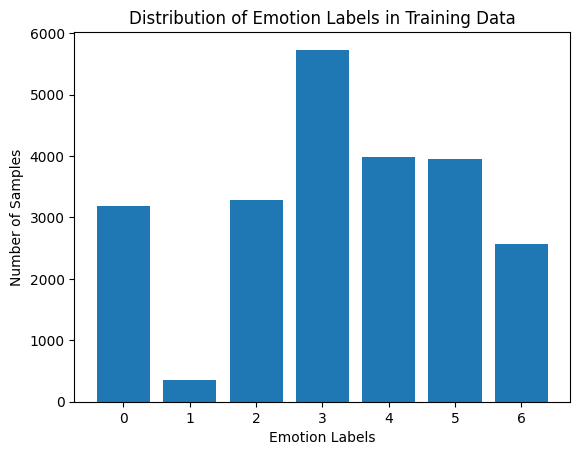

In [16]:
from keras.utils import to_categorical
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Encode labels and create classes
le = preprocessing.LabelEncoder()
le.fit(train_labels) # Use 'train_labels' instead of 'trainLabel'
print("Classes: " + str(le.classes_))
encodeTrainLabels = le.transform(train_labels) # Use 'train_labels' instead of 'trainLabel'

# Convert labels to one-hot encoding
clearTrainLabel = to_categorical(encodeTrainLabels)
num_classes = clearTrainLabel.shape[1]
print("Number of classes: " + str(num_classes))

# Plot of label types numbers
plt.bar(le.classes_, np.bincount(encodeTrainLabels)) # Use a bar plot to show count of each label
plt.xlabel('Emotion Labels')
plt.ylabel('Number of Samples')
plt.title('Distribution of Emotion Labels in Training Data')
plt.show()

Now train_images and test_images are ready to be used in the machine learning model.

**MODEL CREATION**

**Data Generating**<br>
Data generation is done to diversify the training data, thereby enhancing the model's generalization ability and preventing overfitting.

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalization for validation (or test) data
test_datagen = ImageDataGenerator(rescale=1./255)

# Assuming your training data is in 'train_dir' and validation data is in 'val_dir'
train_generator = train_datagen.flow_from_directory(
    '/content/images/images/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/images/images/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

class_labels = train_generator.class_indices
print("Class labels:", class_labels)

class_labels = validation_generator.class_indices
print("Class labels:", class_labels)

Found 23060 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.
Class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


**Weight calculation**

In [22]:
import pandas as pd
from prettytable import PrettyTable
from keras import models, layers, callbacks

#get class indices and labels. calculate class weight
label_map = {}
for k, v in train_generator.class_indices.items():
    label_map[v] = k

class_counts = pd.Series(train_generator.classes).value_counts()
class_weight = {}

for i, c in class_counts.items():
    class_weight[i] = 1.0 / c

norm_factor = np.mean(list(class_weight.values()))

for k in class_counts.keys():
    class_weight[k] = class_weight[k] / norm_factor

t = PrettyTable(['class_index', 'class_label', 'class_weight'])
for i in sorted(class_weight.keys()):
    t.add_row([i, label_map[i], '{:.2f}'.format(class_weight[i])])
print(t)

model = models.Sequential()

+-------------+-------------+--------------+
| class_index | class_label | class_weight |
+-------------+-------------+--------------+
|      0      |    angry    |     0.48     |
|      1      |   disgust   |     4.41     |
|      2      |     fear    |     0.47     |
|      3      |    happy    |     0.27     |
|      4      |   neutral   |     0.39     |
|      5      |     sad     |     0.39     |
|      6      |   surprise  |     0.60     |
+-------------+-------------+--------------+


#**CNN**

In [14]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (48, 48, 1)), # Changed input shape to (48, 48, 1)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 23, 23, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 21, 21, 32)        1

# cnn'den itibaren tekrar bakılacak!!!!!!!!!!!!!!!

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

history = model.fit(train_images, train_labels, steps_per_epoch=50, epochs=30, callbacks=[checkpoint], validation_split = 0.1, verbose=1)

Epoch 1/30
26/50 [==============>...............] - ETA: 19s - loss: 2.1602 - accuracy: 0.2348

KeyboardInterrupt: 

**Fine Tunning : Tune only top layer**